In [220]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


sns.set_theme()

## Data load

In [221]:
budget_raw = pd.read_csv('../data/preprocessed/dotacie_ours_final.csv')
graduates_raw = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
teachers_degrees_raw = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')

In [222]:
budget_raw.columns = ['year', 'uni', 'budget', 'salary_budget', 'students_budget', 'students', 'students_full_time_budget', 'dorm_cap', 'dorm_students', 'dorm_budget', 'pub_07711', 'pub_07712', 'inflation_rate', 'budget_ia']
budget_raw['other_budget'] = budget_raw['budget'] - budget_raw['students_budget'] - budget_raw['salary_budget'] - budget_raw['dorm_budget']
budget_raw.head(5)

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,inflation_rate,budget_ia,other_budget
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,1.0,77024560.0,32810476.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,1.0,21034252.0,8953305.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,1.0,17921956.0,6744846.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,1.0,6960463.0,2769540.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,1.0,9082561.0,4117419.0


In [223]:
graduates_raw.columns = ['uni', 'year', 'first_full_time', 'first_part_time', 'third_full_time', 'third_part_time', 'third_external_inst']
graduates_raw.head(5)

,uni,year,first_full_time,first_part_time,third_full_time,third_part_time,third_external_inst
0,AU,2009,189,0,6,1,0
1,AU,2010,199,0,7,1,0
2,AU,2011,200,0,8,3,0
3,AU,2012,196,0,12,4,0
4,AU,2013,173,0,7,8,0


In [224]:
teachers_degrees_raw.columns = ['uni', 'year', 'teacher_type', 'employment_type', 'drsc', 'phd', 'other', 'total']
teachers_degrees_raw.head(5)

,uni,year,teacher_type,employment_type,drsc,phd,other,total
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0


## Overall budget change

In [225]:
budget_totals = (
    pd.concat(
        [
            budget_raw.groupby('year')['budget'].sum().to_frame('budget'),
            budget_raw.groupby('year')['salary_budget'].sum().to_frame('salary_budget'),
            budget_raw.groupby('year')['students_budget'].sum().to_frame('students_budget'),
            budget_raw.groupby('year')['dorm_budget'].sum().to_frame('dorm_budget'),
            budget_raw.groupby('year')['other_budget'].sum().to_frame('other_budget'),
        ], axis = 1)
        .reset_index()
)
budget_totals['salary_budget_share'] = budget_totals['salary_budget'] / budget_totals['budget']
budget_totals['students_budget_share'] = budget_totals['students_budget'] / budget_totals['budget']
budget_totals['dorm_budget_share'] = budget_totals['dorm_budget'] / budget_totals['budget']
budget_totals['other_budget_share'] = budget_totals['other_budget'] / budget_totals['budget']
budget_totals.head(5)


,year,budget,salary_budget,students_budget,dorm_budget,other_budget,salary_budget_share,students_budget_share,dorm_budget_share,other_budget_share
0,2009,3.829316e+08,172547633,50274862,3352848.0,1.482603e+08,0.450596,0.131289,0.008756,0.387172
1,2010,3.941945e+08,177193101,45552844,3326000.0,1.631544e+08,0.449507,0.115559,0.008437,0.413893
2,2011,3.925506e+08,122195435,47744810,3288800.0,2.193216e+08,0.311286,0.121627,0.008378,0.558709
3,2012,3.091253e+08,126633305,52043774,3288800.0,1.271595e+08,0.409650,0.168358,0.010639,0.411352
4,2013,4.103603e+08,126633305,53252028,3425888.0,2.270491e+08,0.308591,0.129769,0.008348,0.553292


In [226]:
budget_totals

,year,budget,salary_budget,students_budget,dorm_budget,other_budget,salary_budget_share,students_budget_share,dorm_budget_share,other_budget_share
0,2009,3.829316e+08,172547633,50274862,3352848.0,1.482603e+08,0.450596,0.131289,0.008756,0.387172
1,2010,3.941945e+08,177193101,45552844,3326000.0,1.631544e+08,0.449507,0.115559,0.008437,0.413893
2,2011,3.925506e+08,122195435,47744810,3288800.0,2.193216e+08,0.311286,0.121627,0.008378,0.558709
3,2012,3.091253e+08,126633305,52043774,3288800.0,1.271595e+08,0.409650,0.168358,0.010639,0.411352
4,2013,4.103603e+08,126633305,53252028,3425888.0,2.270491e+08,0.308591,0.129769,0.008348,0.553292
5,2014,4.135335e+08,133523287,49175301,3358752.0,2.274762e+08,0.322884,0.118915,0.008122,0.550079
6,2015,4.215895e+08,135020294,50776959,3292528.0,2.324997e+08,0.320265,0.120442,0.007810,0.551484
7,2016,4.433257e+08,143400897,48926749,3132560.0,2.478655e+08,0.323466,0.110363,0.007066,0.559105
8,2017,4.468004e+08,146893641,46983871,3024512.0,2.498983e+08,0.328768,0.105156,0.006769,0.559306
9,2018,4.661215e+08,160104584,45924046,2970880.0,2.571220e+08,0.343482,0.098524,0.006374,0.551620


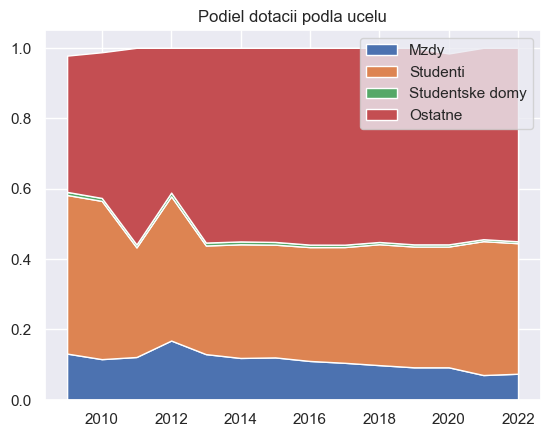

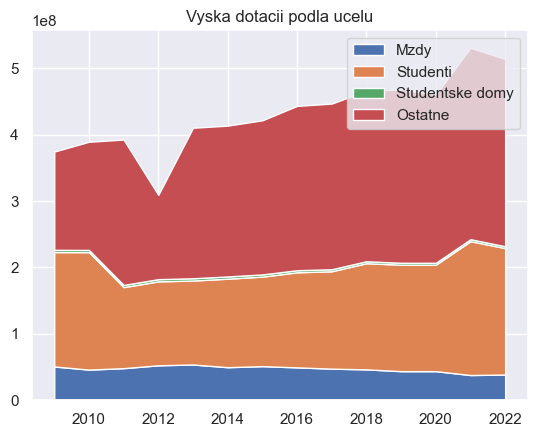

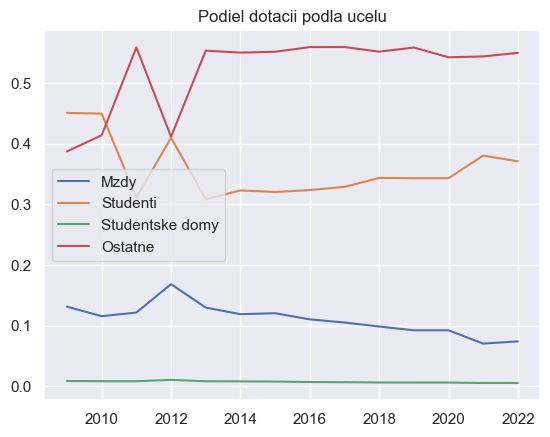

In [227]:
stacked_salary_chart_y = budget_totals[['students_budget_share', 'salary_budget_share', 'dorm_budget_share', 'other_budget_share']].values.T
stacked_salary_chart_y_abs = budget_totals[['students_budget', 'salary_budget', 'dorm_budget', 'other_budget']].values.T
# # Plot
plt.stackplot(budget_totals['year'],stacked_salary_chart_y, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

plt.stackplot(budget_totals['year'],stacked_salary_chart_y_abs, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Vyska dotacii podla ucelu')
plt.legend()
plt.show()


plt.plot(budget_totals['year'],stacked_salary_chart_y.T, label=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

In [228]:
teachers_degrees = teachers_degrees_raw.copy()
teachers_degrees['employment_type'].value_counts()
teachers_degrees['weight'] = teachers_degrees.apply(lambda x: 1 if x.employment_type == 'full-time' else 0.5, axis = 1)
teachers_degrees['total'] *= teachers_degrees['weight']



In [229]:
teachers_types = pd.pivot_table(teachers_degrees.groupby(['uni', 'year', 'teacher_type'])['total'].sum().to_frame('teachers').reset_index(), index = ['uni', 'year'], columns='teacher_type', fill_value=0).reset_index()
teachers_types.columns = ['uni', 'year', 'asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']
teachers_types = teachers_types.merge(budget_raw[['uni', 'year', 'salary_budget']], on = ['uni', 'year'], how = 'left')
teachers_types = teachers_types.dropna()

teachers_types['ucitelia_spolu'] = sum([teachers_types[col] for col in ['asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']])
display(teachers_types)
teachers_types.to_csv('../data/preprocessed/teachers_types_simplified.csv', index = False)

,uni,year,asistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor,salary_budget,ucitelia_spolu
0,AU,2009,11.5,14.5,0,0.0,44.0,33.0,1448749,103.0
1,AU,2010,5.0,18.0,0,0.0,48.5,34.0,1479444,105.5
2,AU,2011,7.0,18.5,0,0.0,55.5,34.5,1147907,115.5
3,AU,2012,5.5,22.0,0,0.0,52.5,35.0,1187816,115.0
4,AU,2013,7.0,24.0,0,0.0,54.0,35.5,1223047,120.5
...,...,...,...,...,...,...,...,...,...,...
275,ŽU,2018,9.5,148.0,0,27.0,312.5,86.0,10899800,583.0
276,ŽU,2019,11.0,149.0,0,26.5,300.5,90.0,10994390,577.0
277,ŽU,2020,10.0,151.0,0,23.5,296.0,84.0,10994390,564.5
278,ŽU,2021,9.0,159.5,0,24.0,260.5,87.0,13183264,540.0


In [285]:
# from sklearn.linear_model import LinearRegression

budget_raw['budget_wo_salary_ia'] = (budget_raw['budget'] - budget_raw['salary_budget']) / budget_raw['inflation_rate']

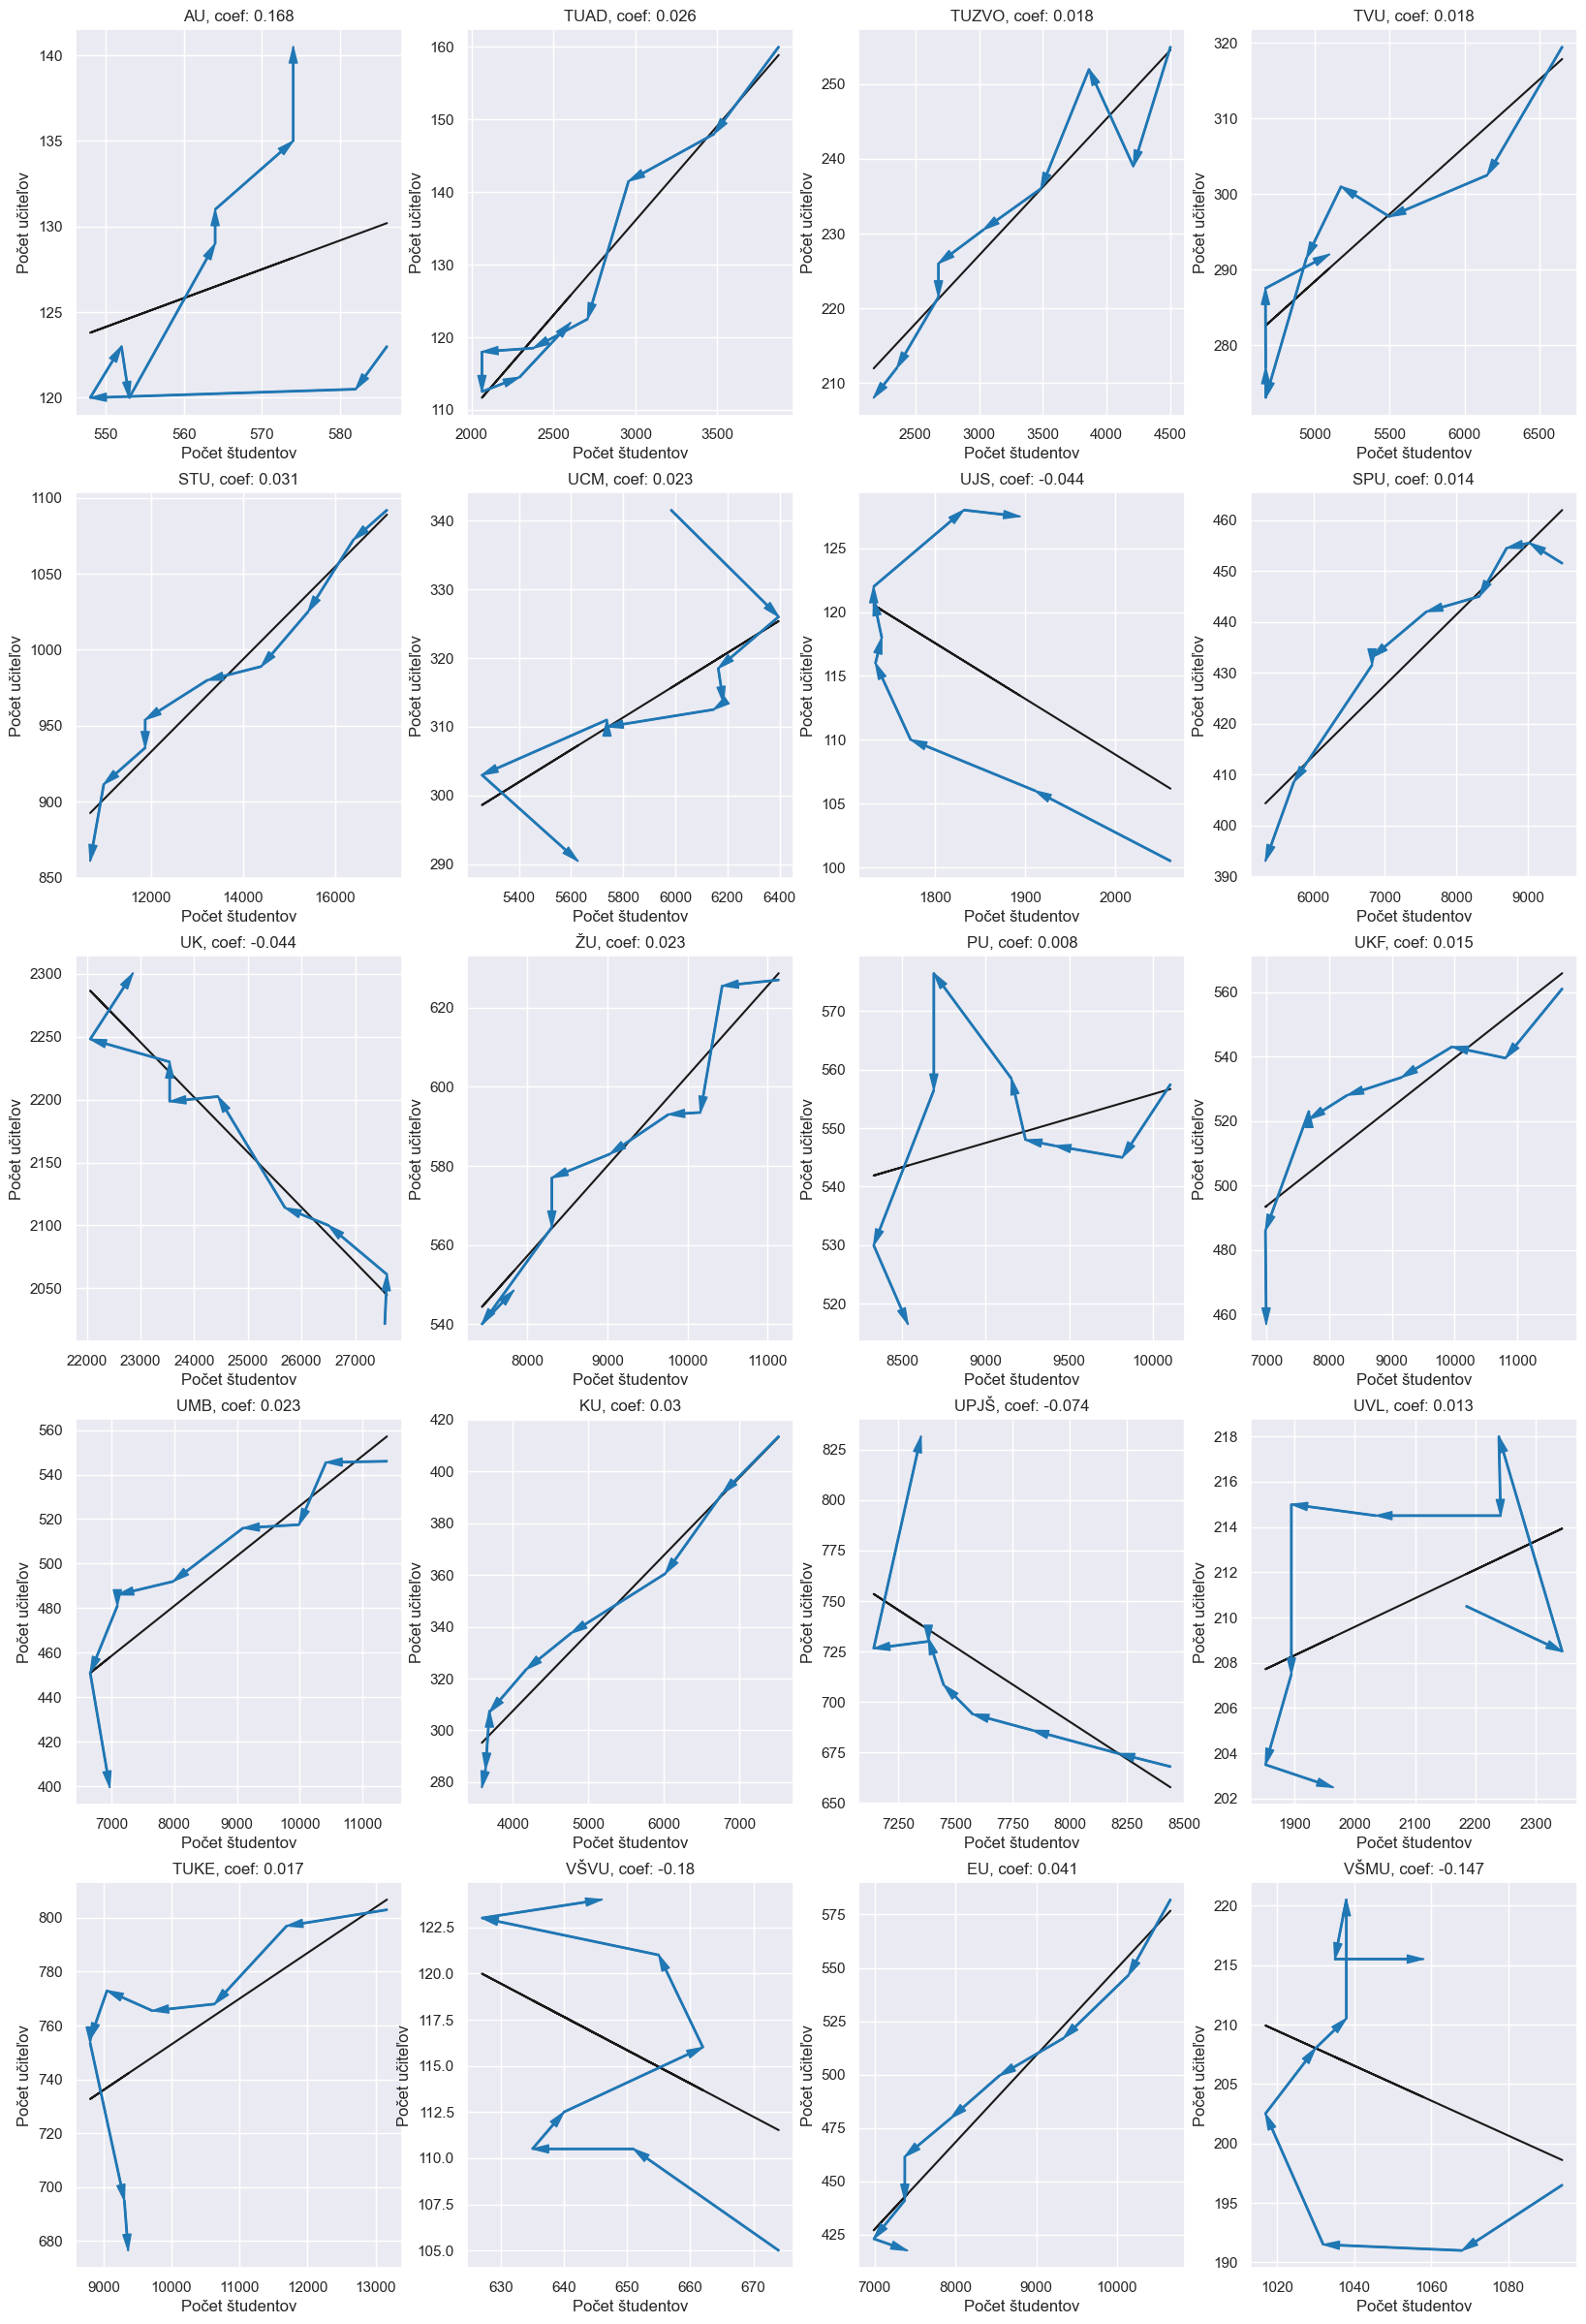

In [294]:
features = teachers_types.merge(budget_raw[['year', 'uni', 'students', 'inflation_rate']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

features

fig, ax = plt.subplots(nrows=5, ncols=4, figsize = (20, 30))

for i, uni in enumerate(features['uni'].unique()):
    r = i // 4
    c = i % 4
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['students']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Počet učiteľov')

    ax[r][c].set_title(f'{uni}, coef: {round(model.coef_[0],3)}')

pass
    

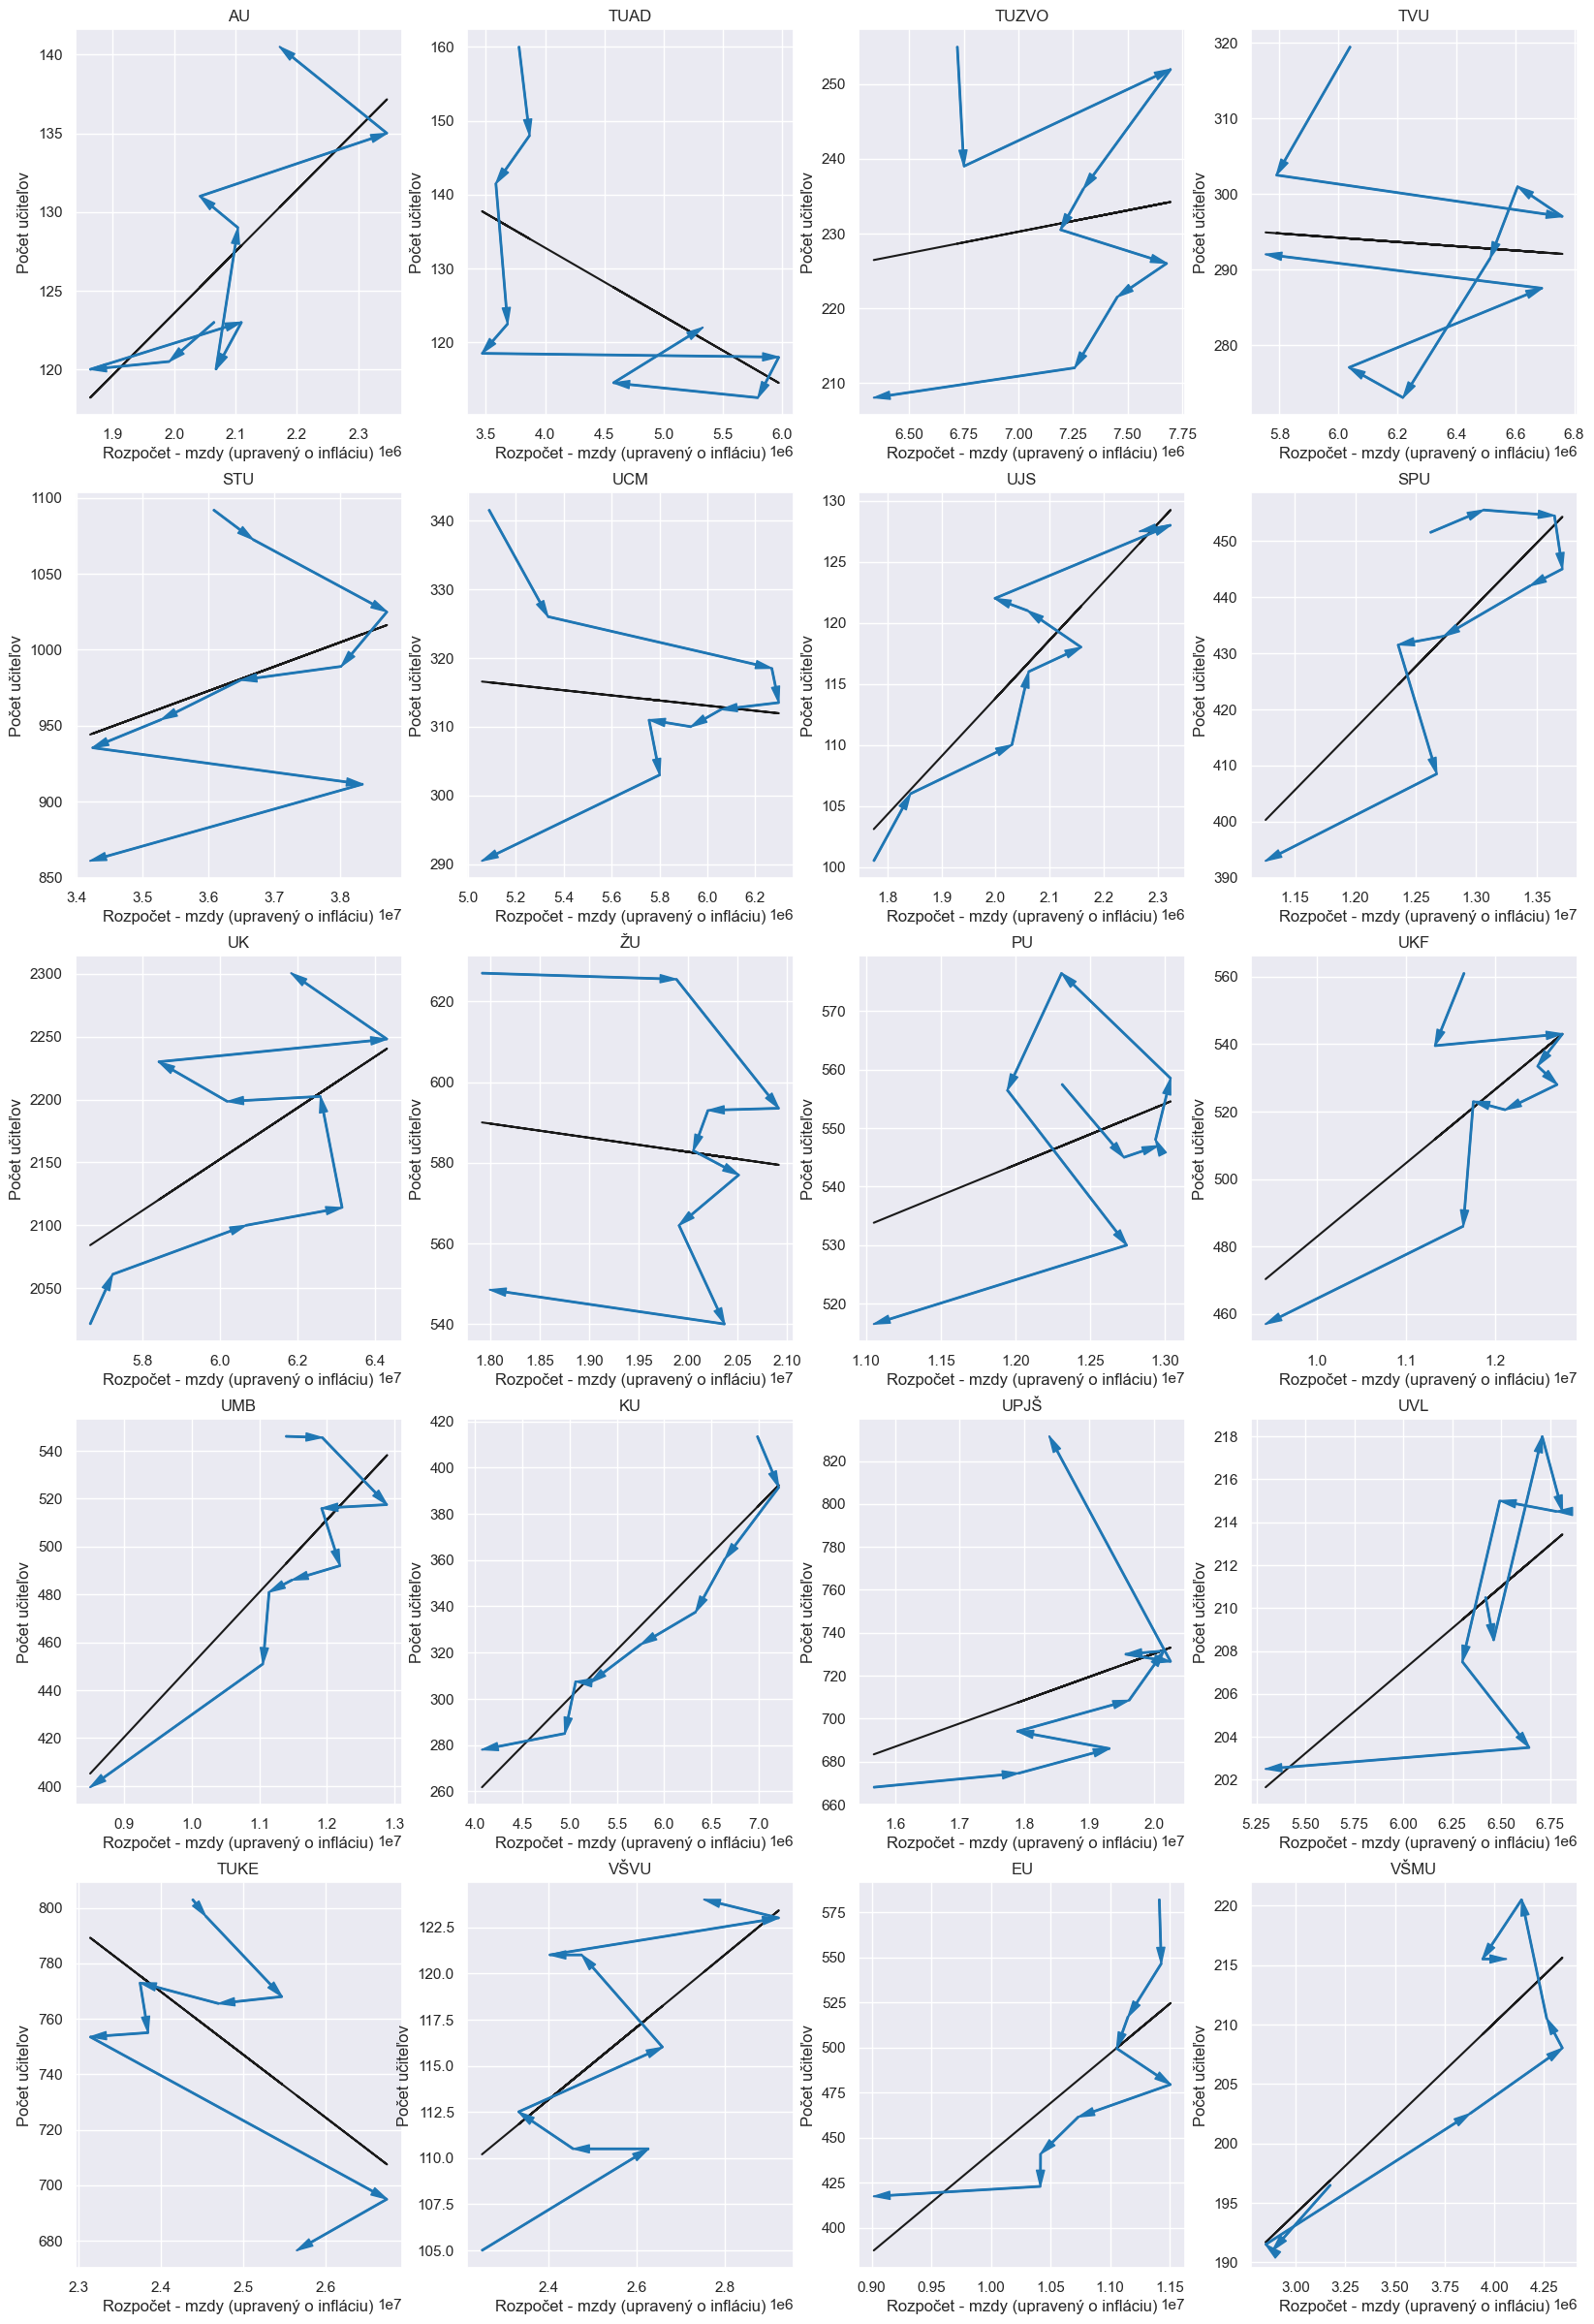

In [288]:
features = teachers_types.merge(budget_raw[['year', 'uni', 'budget_wo_salary_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

features

fig, ax = plt.subplots(nrows=5, ncols=4, figsize = (20, 30))

for i, uni in enumerate(features['uni'].unique()):
    r = i // 4
    c = i % 4
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['budget_wo_salary_ia']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Rozpočet - mzdy (upravený o infláciu)')
    ax[r][c].set_ylabel('Počet učiteľov')

    ax[r][c].set_title(uni)

pass
    

In [ ]:
lrmodel = LinearRegression(positive = True, fit_intercept=False)
lrmodel.fit(teachers_types.query('year in [2015, 2016, 2017] and uni == "STU"').iloc[:, 2:8], teachers_types.query('year in [2015, 2016, 2017] and uni == "STU"').iloc[:, -1])
lrmodel.coef_

array([    0.        ,     0.        ,     0.        ,     0.        ,
       32918.00687533,     0.        ])

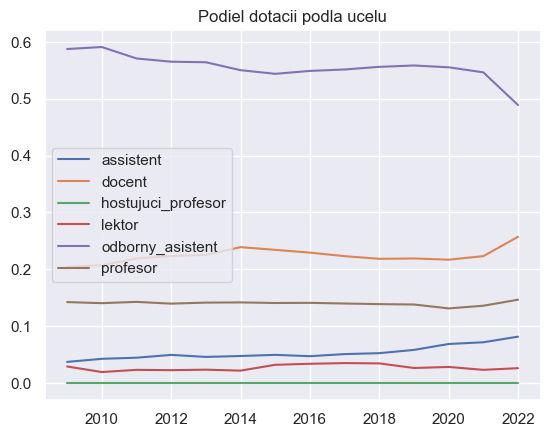

In [ ]:
subset = (teachers_types.query('uni == "UK"')
.iloc[:, :-1]
.set_index(['year', 'uni']))

subset['total'] = sum([subset[col] for col in subset.columns])

for col in subset.columns:
    subset[col] /= subset['total']

subset = subset.iloc[:, :-1]
subset

plt.plot(subset.reset_index()['year'], subset, label=subset.columns)
plt.title('Podiel dotacii podla ucelu')
plt.legend(loc='center left')
plt.show()


In [ ]:
subset.query()

assistent    docent  hostujuci_profesor    lektor  \
year uni                                                        
2019 AU      0.038760  0.236434                 0.0  0.000000   
     TUKE    0.002649  0.336424                 0.0  0.013245   
     UJS     0.090909  0.219008                 0.0  0.000000   
     TVU     0.003663  0.302198                 0.0  0.003663   
     TUAD    0.000000  0.258475                 0.0  0.000000   
     STU     0.009434  0.290356                 0.0  0.008910   
     KU      0.060261  0.278502                 0.0  0.006515   
     SPU     0.002309  0.314088                 0.0  0.013857   
     VŠMU    0.076010  0.228029                 0.0  0.000000   
     TUZVO   0.000000  0.287611                 0.0  0.000000   
     UPJŠ    0.123035  0.207109                 0.0  0.024607   
     ŽU      0.019064  0.258232                 0.0  0.045927   
     UKF     0.000000  0.277618                 0.0  0.023055   
     UMB     0.003086  0.276749                 0.0  0.013374   
     VŠVU    0.066116  0.235537                 0.0  0.000000   
     UK      0.058222  0.219013                 0.0  0.026382   
     UCM     0.003226  0.204839                 0.0  0.027419   
     UVL     0.051163  0.186047                 0.0  0.000000   
     PU      0.024284  0.230703                 0.0  0.053773   
     EU      0.004334  0.219935                 0.0  0.026002   

            odborny_asistent  profesor        x1        x2  
year uni                                                    
2019 AU             0.503876  0.220930 -2.342068  1.052089  
     TUKE           0.492053  0.155629 -1.745516 -1.735130  
     UJS            0.508264  0.181818 -1.359565  2.196004  
     TVU            0.527473  0.163004 -1.348804 -1.090944  
     TUAD           0.550847  0.190678 -1.279812 -0.341402  
     STU            0.526205  0.165094 -1.164612 -0.838303  
     KU             0.506515  0.148208 -1.069765  0.381390  
     SPU            0.532333  0.137413 -0.610044 -1.571977  
     VŠMU           0.539192  0.156770 -0.511368  1.558091  
     TUZVO          0.566372  0.146018 -0.438373 -1.055693  
     UPJŠ           0.502392  0.142857  0.082567  2.553685  
     ŽU             0.520797  0.155979  0.204497 -0.632703  
     UKF            0.558117  0.141210  0.241099 -1.194514  
     UMB            0.578189  0.128601  0.520912 -1.100227  
     VŠVU           0.574380  0.123967  0.562288  0.999537  
     UK             0.558335  0.138049  0.906650  0.869791  
     UCM            0.611290  0.153226  1.504096 -0.085746  
     UVL            0.641860  0.120930  2.002623  1.317058  
     PU             0.589766  0.101474  2.694300 -0.604523  
     EU             0.656555  0.093174  3.150897 -0.676485

In [ ]:

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

In [ ]:
# X = subset.values
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_pca
df_pca = pd.DataFrame(X_pca, columns=['x1', 'x2'], index=subset.index).reset_index()
df_pca.head(4)

,year,uni,x1,x2
0,2019,AU,-2.342068,1.052089
1,2019,EU,3.150897,-0.676485
2,2019,KU,-1.069765,0.381390
3,2019,PU,2.694300,-0.604523


In [ ]:
px.scatter(df_pca, x="x1", y="x2", color='uni', height=700, width=700)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'uni=AU<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'AU',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'AU',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([-2.34206844]),
              'xaxis': 'x',
              'y': array([1.05208857]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=EU<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'EU',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'EU',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([3.15089651]),
              'xaxis': 'x',
              'y': array([-0.67648531]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=KU<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'KU',
              'marker': {'color': '#00cc96', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'KU',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([-1.06976488]),
              'xaxis': 'x',
              'y': array([0.38138997]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=PU<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'PU',
              'marker': {'color': '#ab63fa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'PU',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([2.69429951]),
              'xaxis': 'x',
              'y': array([-0.60452253]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=SPU<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'SPU',
              'marker': {'color': '#FFA15A', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'SPU',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([-0.61004422]),
              'xaxis': 'x',
              'y': array([-1.57197665]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=STU<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'STU',
              'marker': {'color': '#19d3f3', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'STU',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([-1.16461243]),
              'xaxis': 'x',
              'y': array([-0.83830259]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=TUAD<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'TUAD',
              'marker': {'color': '#FF6692', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'TUAD',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([-1.27981225]),
              'xaxis': 'x',
              'y': array([-0.34140184]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=TUKE<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'TUKE',
              'marker': {'color': '#B6E880', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'TUKE',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([-1.74551647]),
              'xaxis': 'x',
              'y': array([-1.73512973]),
              'yaxis': 'y'},
             {'hovertemplate': 'uni=TUZVO<br>x1=%{x}<br>x2=%{y}<extra></extra>',
              'legendgroup': 'TUZVO',
              'mar